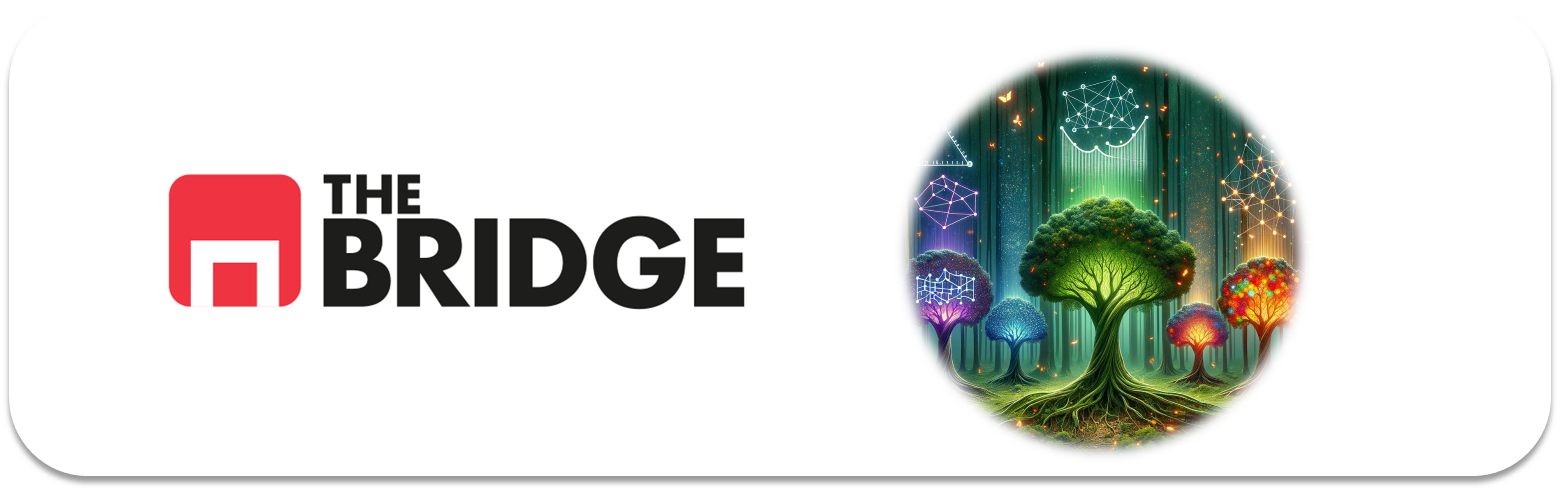

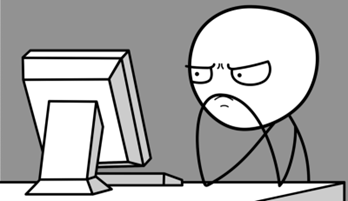

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [14]:
import pandas as pd


### Ejercicio 1

Importa el csv "temps.csv"

In [15]:
temps = pd.read_csv('data/temps.csv')
temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [16]:
# Aplicar one-hot encoding a las variables categóricas
temps_encoded = pd.get_dummies(temps)

# Mostrar las primeras filas del DataFrame codificado
temps_encoded.head()


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,False,True,False


### Ejercicio 3

Divide en train y test

In [17]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(temps_encoded, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", train_data.shape)
print("Dimensiones del conjunto de prueba:", test_data.shape)


Dimensiones del conjunto de entrenamiento: (278, 18)
Dimensiones del conjunto de prueba: (70, 18)


### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar el modelo de árbol de decisión con hiperparámetros por defecto
tree_regressor = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_regressor.fit(train_data.drop('average', axis=1), train_data['average'])


DecisionTreeRegressor(random_state=42)

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [19]:
# Realizar predicciones en el conjunto de prueba
predictions = tree_regressor.predict(test_data.drop('average', axis=1))

# Calcular el Error Absoluto Medio (MAE)
errors = abs(predictions - test_data['average'])
mae = errors.mean()

# Mostrar el MAE
print("Error Absoluto Medio (MAE):", mae)


Error Absoluto Medio (MAE): 0.8328571428571429


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [20]:
# Calcular el Error Porcentual Absoluto Medio (MAPE)
ape = abs((test_data['average'] - predictions) / test_data['average'])
mape = 100 * ape.mean()

# Mostrar el MAPE
print("Error Porcentual Absoluto Medio (MAPE):", mape)


Error Porcentual Absoluto Medio (MAPE): 1.475579641143499


### Ejercicio 7

Representa el árbol de decision

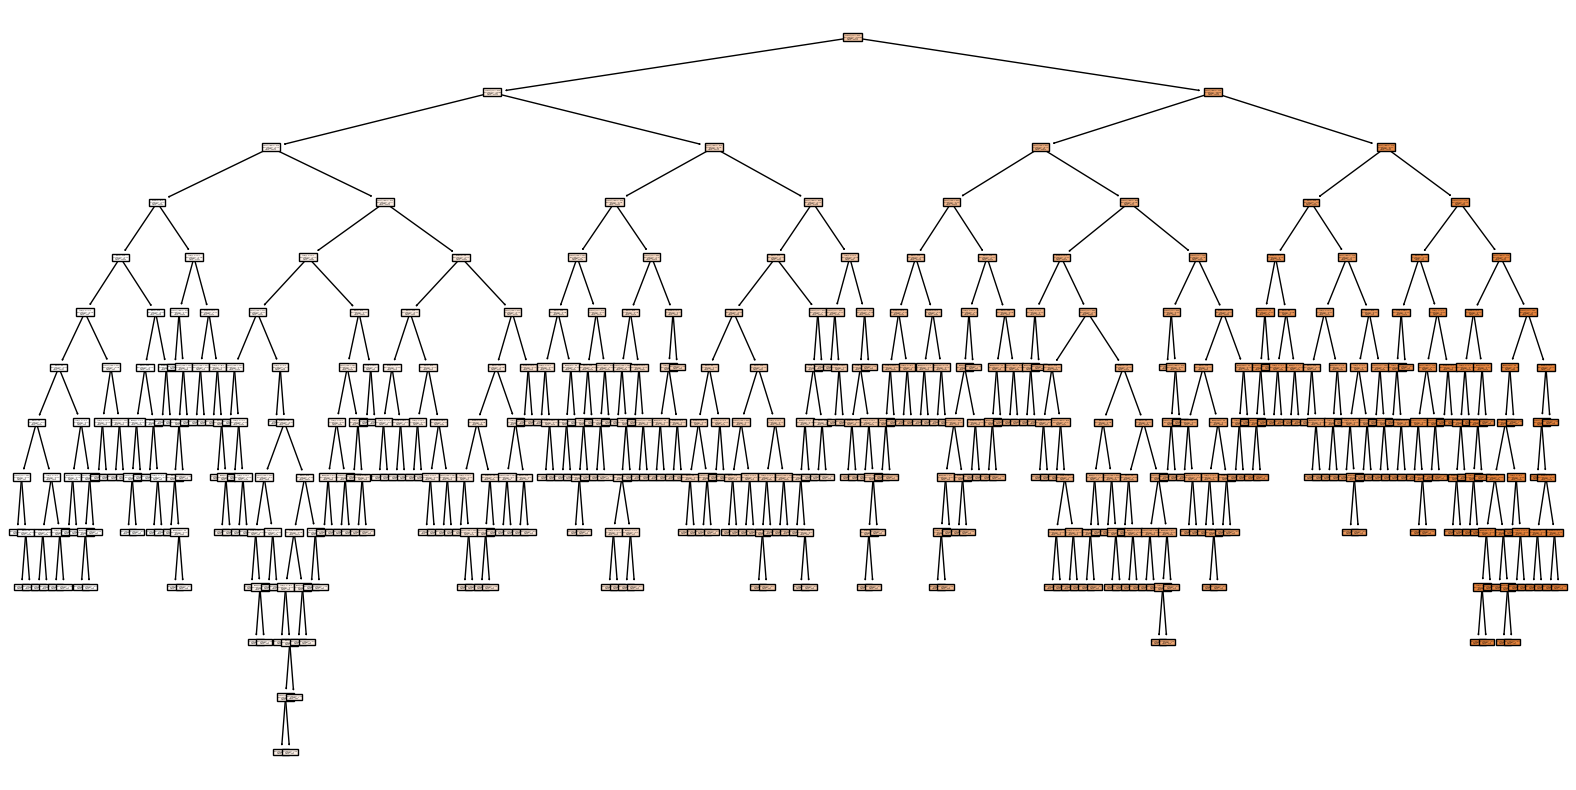

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Representar el árbol de decisión
plot_tree(tree_regressor, filled=True, feature_names=train_data.drop('average', axis=1).columns)

# Mostrar la figura
plt.show()


### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [22]:
# Instanciar el nuevo árbol de decisión con max_depth igual a 3
tree_regressor_depth_3 = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entrenar el nuevo modelo con los datos de entrenamiento
tree_regressor_depth_3.fit(train_data.drop('average', axis=1), train_data['average'])


DecisionTreeRegressor(max_depth=3, random_state=42)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [23]:

# Realizar predicciones en el conjunto de prueba utilizando el nuevo árbol
predictions_depth_3 = tree_regressor_depth_3.predict(test_data.drop('average', axis=1))

# Calcular el MAE para el nuevo árbol
errors_depth_3 = abs(predictions_depth_3 - test_data['average'])
mae_depth_3 = errors_depth_3.mean()

# Calcular el MAPE para el nuevo árbol
ape_depth_3 = abs((test_data['average'] - predictions_depth_3) / test_data['average'])
mape_depth_3 = 100 * ape_depth_3.mean()

# Mostrar el MAE y el MAPE para el nuevo árbol
print("MAE para el árbol con max_depth=3:", mae_depth_3)
print("MAPE para el árbol con max_depth=3:", mape_depth_3)


MAE para el árbol con max_depth=3: 1.3972431864431878
MAPE para el árbol con max_depth=3: 2.430840991344911


### Ejercicio 10

Vuelve a representar su árbol

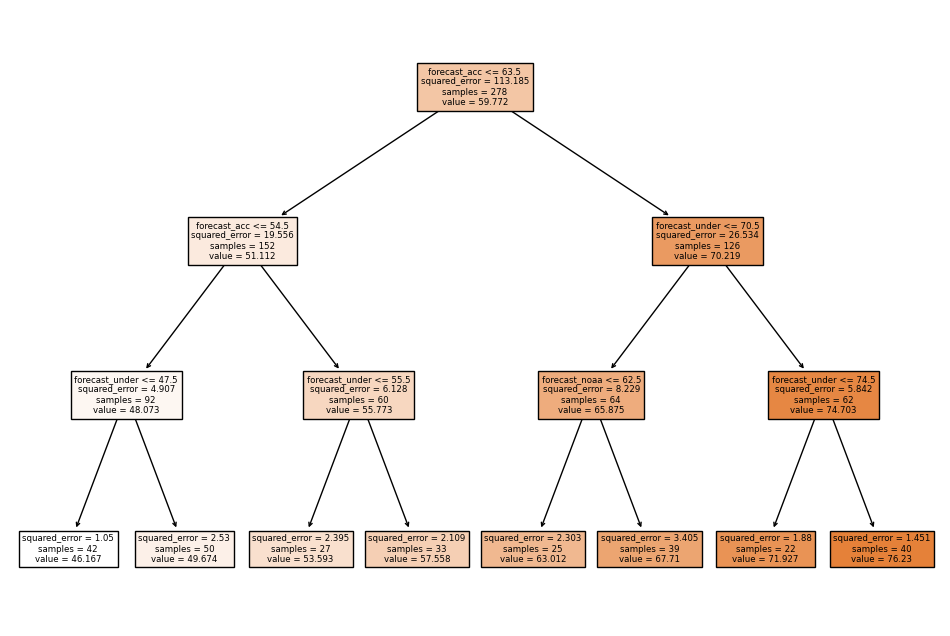

In [24]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Representar el árbol de decisión con max_depth=3
plot_tree(tree_regressor_depth_3, filled=True, feature_names=train_data.drop('average', axis=1).columns)

# Mostrar la figura
plt.show()


### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [25]:
# Obtener la importancia de las características del último modelo
feature_importances_depth_3 = tree_regressor_depth_3.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importance_df = pd.DataFrame({'Feature': train_data.drop('average', axis=1).columns,
                              'Importance': feature_importances_depth_3})

# Ordenar el DataFrame por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(importance_df)


           Feature  Importance
7     forecast_acc    0.884431
8   forecast_under    0.104676
6    forecast_noaa    0.010893
10        week_Fri    0.000000
15       week_Tues    0.000000
14      week_Thurs    0.000000
13        week_Sun    0.000000
12        week_Sat    0.000000
11        week_Mon    0.000000
0             year    0.000000
9           friend    0.000000
1            month    0.000000
5           actual    0.000000
4           temp_1    0.000000
3           temp_2    0.000000
2              day    0.000000
16        week_Wed    0.000000
